In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# We import the data
df = pd.read_csv('data/processed_data.csv', usecols=['text', 'date', 'favorited', 'retweeted', 'replies', 'user', 'lang'])

df.head()

,text,date,favorited,retweeted,replies,user,lang
0,"Los ""pollos"" queremos un Presidente ""pollo"". U...",2018-01-27 22:24:45,629,336,85,708108228568207360,es
1,Vota por @IvanDuque en la consulta @CeDemocrat...,2018-01-27 21:51:25,793,535,136,149281495,es
2,Compartimos con alegría nuestra propuesta de p...,2018-01-27 21:50:15,188,119,4,77653794,es
3,.@FNAraujoR #4 Senado @IvanDuque #ElCandidato...,2018-01-27 21:46:13,34,27,2,1069678676,es
4,The girls flocking to see Mr. Duque. That's g...,2018-01-27 20:54:10,1,0,0,876674787115925504,en


In [3]:
# Again, we convert the date column into dates
df['date'] = pd.to_datetime(df['date'])

# And set it as the index
df.set_index('date', inplace=True)

df.head()

,text,favorited,retweeted,replies,user,lang
date,,,,,,
2018-01-27 22:24:45,"Los ""pollos"" queremos un Presidente ""pollo"". U...",629,336,85,708108228568207360,es
2018-01-27 21:51:25,Vota por @IvanDuque en la consulta @CeDemocrat...,793,535,136,149281495,es
2018-01-27 21:50:15,Compartimos con alegría nuestra propuesta de p...,188,119,4,77653794,es
2018-01-27 21:46:13,.@FNAraujoR #4 Senado @IvanDuque #ElCandidato...,34,27,2,1069678676,es
2018-01-27 20:54:10,The girls flocking to see Mr. Duque. That's g...,1,0,0,876674787115925504,en


## Adding columns to identify the mentioned candidates

As with the analyzing the data notebook, we'll add a couple of columns to indicate which of the candidates are mentioned on each tweet.

In [4]:
df['mentions_duque'] = df['text'].str.lower().str.contains('@ivanduque')
df['mentions_petro'] = df['text'].str.lower().str.contains('@petrogustavo')

# Let's set those columns as boolean
df['mentions_duque'] = df['mentions_duque'].astype('bool')
df['mentions_petro'] = df['mentions_petro'].astype('bool')

df.head()

,text,favorited,retweeted,replies,user,lang,mentions_duque,mentions_petro
date,,,,,,,,
2018-01-27 22:24:45,"Los ""pollos"" queremos un Presidente ""pollo"". U...",629,336,85,708108228568207360,es,True,False
2018-01-27 21:51:25,Vota por @IvanDuque en la consulta @CeDemocrat...,793,535,136,149281495,es,True,False
2018-01-27 21:50:15,Compartimos con alegría nuestra propuesta de p...,188,119,4,77653794,es,False,False
2018-01-27 21:46:13,.@FNAraujoR #4 Senado @IvanDuque #ElCandidato...,34,27,2,1069678676,es,True,False
2018-01-27 20:54:10,The girls flocking to see Mr. Duque. That's g...,1,0,0,876674787115925504,en,False,False


## Removing tweets created by the candidates

Now, as in the previous notebook, we will remove the tweets created by the candidates themselves.

In [5]:
df.drop(df[(df['user'] == 77653794) | (df['user'] == 49849732)].index, axis=0, inplace=True)

# Creating a part-of-speech (POS) tagger

Now, in order to see if some POS tags are more frequent than others in general or if it varies from one candidate to the other, we'll create a POS tagger and apply it over the corpus of our text.

for this section you'll need NLKT, and the cess_esp corpus downloaded.

You can download it by running (from a Python console or script):

```python
import nltk
nltk.download('cess_esp')
```

Victor Peinado provided a mapping from the whole spanish tagset to the universal tagset. I think it's part of the AnCora corpus, and you can download it from [here](https://github.com/vitojph/kschool-nlp-13/blob/master/data/es-ancora.map)

After downloading it, you should place it in the `universal_tagset` folder of NLTK like this:

```bash
$ cd /path/to/your/downloaded/file
$ cp es-ancora.map ~/nltk_data/taggers/universal_tagset
```

And with all that, you should be good to go.

In [7]:
# We import NLTK and the cess_esp corpus
import nltk
from nltk.corpus import cess_esp

# We specify that the corpus should use the 'es-ancora' tagset
cess_esp._tagset = 'es-ancora'

# We get the tagged sentences from the corpus
tagged_sents = cess_esp.tagged_sents(tagset='universal')

# Let's look what one of those looks like
print(tagged_sents[0])

[('El', 'DET'), ('grupo', 'NOUN'), ('estatal', 'ADJ'), ('Electricité_de_France', 'NOUN'), ('-Fpa-', '.'), ('EDF', 'NOUN'), ('-Fpt-', '.'), ('anunció', 'VERB'), ('hoy', 'ADV'), (',', '.'), ('jueves', 'X'), (',', '.'), ('la', 'DET'), ('compra', 'NOUN'), ('del', 'ADP'), ('51_por_ciento', 'NUM'), ('de', 'ADP'), ('la', 'DET'), ('empresa', 'NOUN'), ('mexicana', 'ADJ'), ('Electricidad_Águila_de_Altamira', 'NOUN'), ('-Fpa-', '.'), ('EAA', 'NOUN'), ('-Fpt-', '.'), (',', '.'), ('creada', 'ADJ'), ('por', 'ADP'), ('el', 'DET'), ('japonés', 'ADJ'), ('Mitsubishi_Corporation', 'NOUN'), ('para', 'ADP'), ('poner_en_marcha', 'VERB'), ('una', 'DET'), ('central', 'NOUN'), ('de', 'ADP'), ('gas', 'NOUN'), ('de', 'ADP'), ('495', 'X'), ('megavatios', 'NOUN'), ('.', '.')]


In [8]:
# Now, we define a size for the train set
size = int(len(tagged_sents) * 0.9)

# And split the corpus into train and test sets using the defined size
train, test = tagged_sents[:size], tagged_sents[size:]

## Naive solution

For our first naive solution we'll create a default tagger, to classify everything as a noun.

We'll then create a unigram tagger trained on the train set, and use the default tagger as a backoff.

In [9]:
# We create the default tagger, to tag everything as a noun
default_tagger = nltk.DefaultTagger('NOUN')

In [10]:
# We create a unigram tagger, trained with the train set, and using the default_tagger as a backoff
unigram_tagger = nltk.UnigramTagger(train, backoff=default_tagger)

Now let's take a look at how this tagger performs against the test set and against our data

In [11]:
unigram_tagger.evaluate(test)

0.8808672009158558

Well this isn't bad at all.

Let's try it on our data.

In [12]:
for text in df['text'][1:5]:
    print("\n")
    print(unigram_tagger.tag(text.split()))
    print("\n")



[('Vota', 'NOUN'), ('por', 'ADP'), ('@IvanDuque', 'NOUN'), ('en', 'ADP'), ('la', 'DET'), ('consulta', 'NOUN'), ('@CeDemocratico', 'NOUN'), ('el', 'DET'), ('partido', 'NOUN'), ('del', 'ADP'), ('Uribismo', 'NOUN'), ('y', 'CONJ'), ('de', 'ADP'), ('@AlvaroUribeVel', 'NOUN'), ('pic.twitter.com/7CzVECAOHu', 'NOUN')]




[('.@FNAraujoR', 'NOUN'), ('#4', 'NOUN'), ('Senado', 'NOUN'), ('@IvanDuque', 'NOUN'), ('#ElCandidatoDeLaEsperanza', 'NOUN'), ('#1', 'NOUN'), ('en', 'ADP'), ('la', 'DET'), ('Consulta', 'NOUN'), ('Interpartidista', 'NOUN'), ('@AlvaroUribeVel', 'NOUN'), ('#', 'NOUN'), ('1', 'X'), ('Senado', 'NOUN'), ('.@CeDemocratico', 'NOUN'), (',', '.'), ('están', 'VERB'), ('sembrando', 'NOUN'), ('Esperanza', 'NOUN'), ('en', 'ADP'), ('cada', 'DET'), ('Rincón', 'NOUN'), ('de', 'ADP'), ('La', 'DET'), ('Patria', 'NOUN'), ('para', 'ADP'), ('que', 'PRON'), ('los', 'DET'), ('tiempos', 'NOUN'), ('de', 'ADP'), ('la', 'DET'), ('Seguridad', 'NOUN'), ('Democrática', 'NOUN'), ('Regrese.', 'NOUN'), ('#Lo

That's not bad at all. But let's try to create a slightly better tagger.

### Creating a slightly better tagger

We'll repeat the same we did with the unigram tagger and the default tagger.

For this, we'll create a bigram tagger, which will use the unigram tagge as a backoff, and a trigram tagger, which will use the bigram tagger as a backoff

In [13]:
# We create a bigram tagger, trained with the train set, and using the unigram_tagger as a backoff
bigram_tagger = nltk.BigramTagger(train, backoff=unigram_tagger)

In [14]:
# We create a trigram tagger, trained with the train set and using the bigram_tagger as a backoff
trigram_tagger = nltk.TrigramTagger(train, backoff=bigram_tagger)

And let's see how it compares

In [15]:
# And let's see what the precision of this final tagger is
trigram_tagger.evaluate(test)

0.8943188322839153

Well, the improvement from the previous tagger isn't that much, but it's now nearly at 90%

Now let's see if we might spot any difference with our tweet data

In [16]:
for text in df['text'][1:5]:
    print("\n")
    print(trigram_tagger.tag(text.split()))
    print("\n")



[('Vota', 'NOUN'), ('por', 'ADP'), ('@IvanDuque', 'NOUN'), ('en', 'ADP'), ('la', 'DET'), ('consulta', 'NOUN'), ('@CeDemocratico', 'NOUN'), ('el', 'DET'), ('partido', 'NOUN'), ('del', 'ADP'), ('Uribismo', 'NOUN'), ('y', 'CONJ'), ('de', 'ADP'), ('@AlvaroUribeVel', 'NOUN'), ('pic.twitter.com/7CzVECAOHu', 'NOUN')]




[('.@FNAraujoR', 'NOUN'), ('#4', 'NOUN'), ('Senado', 'NOUN'), ('@IvanDuque', 'NOUN'), ('#ElCandidatoDeLaEsperanza', 'NOUN'), ('#1', 'NOUN'), ('en', 'ADP'), ('la', 'DET'), ('Consulta', 'NOUN'), ('Interpartidista', 'NOUN'), ('@AlvaroUribeVel', 'NOUN'), ('#', 'NOUN'), ('1', 'X'), ('Senado', 'NOUN'), ('.@CeDemocratico', 'NOUN'), (',', '.'), ('están', 'VERB'), ('sembrando', 'NOUN'), ('Esperanza', 'NOUN'), ('en', 'ADP'), ('cada', 'DET'), ('Rincón', 'NOUN'), ('de', 'ADP'), ('La', 'DET'), ('Patria', 'NOUN'), ('para', 'ADP'), ('que', 'CONJ'), ('los', 'DET'), ('tiempos', 'NOUN'), ('de', 'ADP'), ('la', 'DET'), ('Seguridad', 'NOUN'), ('Democrática', 'NOUN'), ('Regrese.', 'NOUN'), ('#Lo

Right off the top it's not easy to spot a difference. But let's run a little snippet to see if there are any

In [17]:
l1 = [unigram_tagger.tag(text.split()) for text in df['text'][1:5]]
l2 = [trigram_tagger.tag(text.split()) for text in df['text'][1:5]]

for i in range(0, len(l1)):
    for j in range(0, len(l1[i])):
        if l1[i][j] != l2[i][j]:
            print("Items at position [{},{}] differ.\nUnigram tagger produced: {}\nTrigram tagger produced: {}".format(i, j, l1[i][j], l2[i][j]))


Items at position [1,26] differ.
Unigram tagger produced: ('que', 'PRON')
Trigram tagger produced: ('que', 'CONJ')


Well, the results show that only one word from all of the first five sentences was classified differently.

The word was 'que'. The unigram tagger tagged it as a pronoun. Whereas the trigram tagger tagged it as a conjunction.

This makes a lot of sense, since unigram taggers only tag words per se, that is, completely ignoring the context. While a trigram tagger takes into account the neighbouring words, allowing for examples like this to be classified correctly.

And to be fair, one word in five sentences isn't irrelevant.

Now, another thing that comes to attention is the fact that the fourth tweet was actually in english. And therefore, all of the words in that tweet classified as nouns.

So, we can fix this taking advantage of NLTK's tools.

### Using a different tagger for english

We'll create some english taggers and use those to tag the tweets that Twitter identified to be in english, and we'll keep using our trigram_tagger for the rest of the tweets.

For this, we'll use the example taggers created by Victor Peinado on his class notebooks. You can find that [here](https://github.com/vitojph/kschool-nlp-13/blob/8cc2b8c5815d41b51ee2e2bc4789dd7ef4779646/notebooks/pos-tagger-es.ipynb)

In [18]:
# The first thing is to include the brown corpus, to use it to train the classifiers.
from nltk.corpus import brown

# And we store the tagged sents from articles in the news category. We use the universal tagset here as well.
brown_tagged_sents = brown.tagged_sents(categories='news', tagset='universal')

In [19]:
# Now, we use the same Regular expressions used by Victor Peinado and create a regex tagger, just like he does

patterns = [
    (r'[Aa]m$', 'BEM'),               # irregular forms of 'to be' 
    (r'[Aa]re$', 'BER'),              #  
    (r'[Ii]s$', 'BEZ'),               #  
    (r'[Ww]as$', 'BEDZ'),             #  
    (r'[Ww]ere$', 'BED'),             #  
    (r'[Bb]een$', 'BEN'),             #  
    (r'[Hh]ave$', 'HV'),              # irregular forms of 'to be' 
    (r'[Hh]as$', 'HVZ'),              #  
    (r'[Hh]ad$', 'HVD'),              #
    (r'I$', 'PRP'),                   # personal pronouns
    (r'[Yy]ou$', 'PRP'),              # 
    (r'[Hh]e$', 'PRP'),               # 
    (r'[Ss]he$', 'PRP'),              # 
    (r'[Ii]t$', 'PRP'),               # 
    (r'[Tt]hey$', 'PRP'),             # 
    (r'[Aa]n?$', 'AT'),               # 
    (r'[Tt]he$', 'AT'),               # 
    (r'[Ww]h.+$', 'WP'),              # wh- pronoun
    (r'.*ing$', 'VBG'),               # gerunds
    (r'.*ed$', 'VBD'),                # simple past
    (r'.*es$', 'VBZ'),                # 3rd singular present
    (r'[Cc]an(not|n\'t)?$', 'MD'),    # modals
    (r'[Mm]ight$', 'MD'),             # 
    (r'[Mm]ay$', 'MD'),               # 
    (r'.+ould$', 'MD'),               # modals: could, should, would
    (r'.*ly$', 'RB'),                 # adverbs
    (r'.*\'s$', 'NN$'),               # possessive nouns
    (r'.*s$', 'NNS'),                 # plural nouns
    (r'-?[0-9]+(.[0-9]+)?$', 'CD'),   # cardinal numbers
    (r'^to$', 'TO'),                  # to 
    (r'^in$', 'IN'),                  # in prep
    (r'^[A-Z]+([a-z])*$', 'NNP'),     # proper nouns 
    (r'.*', 'NN')                     # nouns (default)
]

regex_tagger = nltk.RegexpTagger(patterns)

In [20]:
# And we define a size for train and test sets, just like with the spanish tagger
brown_size = int(len(brown_tagged_sents) * 0.9)
brown_train, brown_test = brown_tagged_sents[:brown_size], brown_tagged_sents[brown_size:]

In [21]:
# And finally we create the ngram taggers with backoff on the previous one
# and for unigrams tagger with the regex tagger for a backoff
en_unigram_tagger = nltk.UnigramTagger(brown_train, backoff=regex_tagger)

en_bigram_tagger = nltk.BigramTagger(brown_train, backoff=en_unigram_tagger)

en_trigram_tagger = nltk.TrigramTagger(brown_train, backoff=en_bigram_tagger)

And now let's look at the result of tagging that tweet that was in english with the new `en_trigram_tagger`

In [22]:
en_trigram_tagger.tag(df['text'][3].split())

[('The', 'DET'),
 ('girls', 'NOUN'),
 ('flocking', 'VBG'),
 ('to', 'PRT'),
 ('see', 'VERB'),
 ('Mr.', 'NOUN'),
 ('Duque.', 'NN'),
 ("That's", 'PRT'),
 ('good.', 'NN')]

Great. This is all that we need.

Now let's actually tag the text of all of our tweets.

## Tagging the text of all of the tweets

In [23]:
# First let's bring in our handy remove_special_characters function from the previous notebook.

import re

def remove_special_characters(text):
    period = re.compile("(\.|\:)")
    # We remove periods only if they're at the first or last position
    if period.match(text, 0, 1):
        text = text[1:]
    if period.match(text, len(text) - 1, len(text)):
        text = text[:-1]
    # And we remove special characters other than periods, hash signs, ad signs, letters with tildes, and numbers
    text = re.sub("[^\:a-zA-Z0-9áéíóúüñÁÉÍÓÚÑ\.#@\/\s]", "", text)
    # Finally, we return the lowercase version of the word
    return text.lower()

In [24]:
# As a little extra step, we need to remove words with no tweet text
df = df[~df['text'].isnull()]

# Now, we create an array to store all of the words with their respective tag
duque_tagged_words = []
petro_tagged_words = []
other_tagged_words = []

# And we iterate over the dataframe, populating the list
for (_, x) in df.iterrows():
    tweet_words = list(map(remove_special_characters, x['text'].split()))
    if x['lang'] == 'en':
        # We use the english tagger if the detected language is english
        tagged_words = en_trigram_tagger.tag(tweet_words)
    else:
        # Otherwise, we use the spanish tagger
        tagged_words = trigram_tagger.tag(tweet_words)
    if x['mentions_duque'] and not x['mentions_petro']:
        duque_tagged_words += tagged_words
    elif x['mentions_petro'] and not x['mentions_duque']:
        petro_tagged_words += tagged_words
    else:
        other_tagged_words += tagged_words

In [25]:
print(len(duque_tagged_words), len(petro_tagged_words), len(other_tagged_words))

230650 283820 161637


Now we've got all of the words tagged and classified by the candidate they mention.

Let's now calculate the frequency for the tags of the tweets mentioning the different candidates

In [26]:
# We create empty dicts to store the frequencies
duque_tags_freq = {}
petro_tags_freq = {}
other_tags_freq = {}

# And we populate them like we did in the other notebook with the different ngrams
for (_word, tag) in duque_tagged_words:
    duque_tags_freq[tag] = duque_tags_freq.get(tag, 0) + 1

for (_word, tag) in petro_tagged_words:
    petro_tags_freq[tag] = petro_tags_freq.get(tag, 0) + 1

for (_word, tag) in other_tagged_words:
    other_tags_freq[tag] = other_tags_freq.get(tag, 0) + 1

And finally let's sort them by frequency

In [27]:
sorted_tags = {
    'petro': sorted(petro_tags_freq.items(), key=lambda kv: kv[1], reverse=True),
    'duque': sorted(duque_tags_freq.items(), key=lambda kv: kv[1], reverse=True),
    'other': sorted(other_tags_freq.items(), key=lambda kv: kv[1], reverse=True)
}

### Visualizing the most frequent tags by candidate

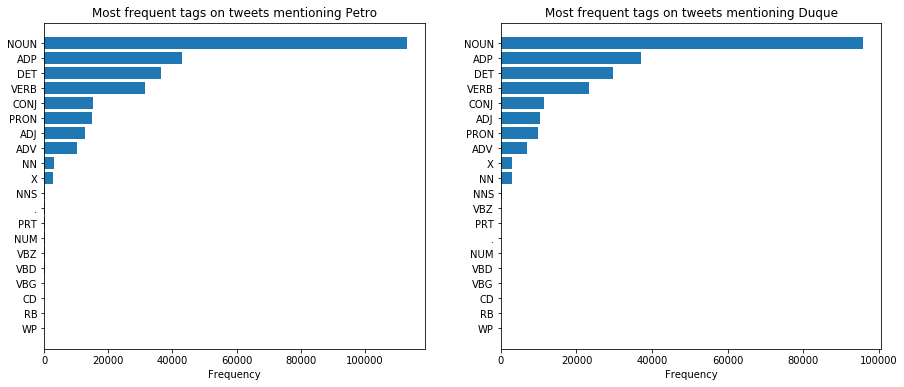

In [28]:
ypos = np.arange(20)

fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(15, 6))

petro_data = dict(sorted_tags['petro'])
duque_data = dict(sorted_tags['duque'])

ax.barh(ypos, list(petro_data.values()), align='center')
ax.set_yticks(ypos)
ax.set_yticklabels(list(petro_data.keys()))
ax.set_xlabel('Frequency')
ax.set_title("Most frequent tags on tweets mentioning Petro")
ax.invert_yaxis()

ax2.barh(ypos, list(duque_data.values()), align='center')
ax2.set_yticks(ypos)
ax2.set_yticklabels(list(duque_data.keys()))
ax2.set_xlabel('Frequency')
ax2.set_title("Most frequent tags on tweets mentioning Duque")
ax2.invert_yaxis()

plt.show()

Here we've got the results.

They don't really seem very interesting.

The most frequent tag in both cases was NOUN. This makes complete sense, because all of the hashtags and twitter handles are being tagged as nouns. Also, all of the words that cannot be correctly tagged, are tagged as NOUNs.

Then come the ADP and DET tags. Which makes a lot of sense, because most of the stopwords fall into these tags, and as was seen on the previous notebook, stopwords have the highest frequencies in text.

The only difference that's probably worth mentioning, is that the tweets mentioning Ivan Duque contained more adjectives than those mentioning Gustavo Petro. This could be because of his followers flattering him, or because of his oppositors insulting him.

# Analyzing sentiment

Sentiment analysis is a challenge by itself. But libraries such as TextBlob make it easier. However, these libraries make it easier for identifying sentiment on english sentences. It's not as easy with spanish. So, we'll create a sentiment analyzer that works with text in spanish.

## TASS corpus

Luckily for us, TASS, the Taller de Análisis Semántico de la SEPLN (Sociedad Española para el Procesamiento de Lenguaje Natural), makes their tagged datasets available for non commercial use. You can fill out a form to obtain a license and receive links to download TASS datasets [here](http://www.sepln.org/workshops/tass/tass_data/download.php)

TASS holds yearly challenges regarding sentiment analysis classification.

The task #1 for the 2018 challenge was sentiment analysis of tweet data. You can read all about it [here](http://www.sepln.org/workshops/tass/2018/task-1/). So, this dataset is perfect for this project!

So, let's get to it.

I've downloaded it and added it to the `/data` directory. If you want to replicate this you'll have to apply for a license and download the data, for I'm not allowed to distribute it.

In [32]:
# Let's see the files we've downloaded from TASS
! ls data/ | grep xml

general-test.xml
general-train-tagged.xml
intertass-CR-development-tagged.xml
intertass-CR-test.xml
intertass-CR-train-tagged.xml
intertass-ES-development-tagged.xml
intertass-ES-test.xml
intertass-ES-train-tagged.xml
intertass-PE-development-tagged.xml
intertass-PE-test.xml
intertass-PE-train-tagged.xml


So, these are all the datasets we have.

The ones containing **'CR'** are from Costa Rican tweets. The ones containing **'PE'** are from Peruvian tweets. And the ones containing **'ES'** are from Spanish tweets.

The other two that remain are general datasets.

As you may see, all of these files come in xml format, so we'll need to parse them in order to be able to use them

### Parsing XML files

Let's first take a look at what the structure of this XML files looks like

In [35]:
! head -n 50 data/intertass-ES-development-tagged.xml

<?xml version="1.0" encoding="UTF-8"?>
<tweets>
	<tweet>
		<tweetid>770976639173951488</tweetid>
		<user>noseashetero</user>
		<content>@noseashetero 1000/10 de verdad a ti que voy a decir petarda que te quiero más que a mí mismo  ✨</content>
		<date>2016-08-31 13:28:49</date>
		<lang>es</lang>
		<sentiment>
			<polarity><value>P</value></polarity>
		</sentiment>
	</tweet>
	<tweet>
		<tweetid>771092421866389508</tweetid>
		<user>Templelx</user>
		<content>@piscolabisaereo @HistoriaNG @SPosteguillo las tengo pero aún no las he leído. Caerán prontito </content>
		<date>2016-08-31 21:08:54</date>
		<lang>es</lang>
		<sentiment>
			<polarity><value>P</value></polarity>
		</sentiment>
	</tweet>
	<tweet>
		<tweetid>771092111429083136</tweetid>
		<user>esskuu94</user>
		<content>Al final han sido 3h  Bueno, mañana tengo fiesta así que.. No me quejo </content>
		<date>2016-08-31 21:07:40</date>
		<lang>es</lang>
		<sentiment>
			<polarity><value>P</value></polarity>
		</sentiment>
	</tweet>
	<

So, we can see that the structure is as follows:

```
tweets: [
    tweet({
        'tweetid': '',
        'user': '',
        'content': '',
        'date': '',
        'lang': '',
        'sentiment': {
            'polarity': {
                'value': ''
            }
        }
    }),
    ...
]
```

From this, what we only really need is the text, because it's what produces the sentiment polarity, and of course the sentiment polarity.

These will be nested under `tweet.content` and `tweet.sentiment.polarity.value`.

Now that we now what we need to extract, let's get to it

In [210]:
# We'll use the lxml package for this
from lxml import objectify, etree

def import_data(path):
    # We create an empty dataframe
    df = pd.DataFrame()
    # We parse the file from the path into an etree
    tree = etree.parse(path)
    # We extract the content as an array from the tweets and add it to a 'content' column on the dataframe
    content = []
    polarity = []
    for tweet in tree.findall('tweet'):
        if tweet.find('sentiment') is not None:
            content.append(tweet.find('content').text)
            polarity.append(tweet.find('sentiment').find('polarity').find('value').text)
        elif tweet.find('sentiments') is not None:
            content.append(tweet.find('content').text)
            polarity.append(tweet.find('sentiments').find('polarity').find('value').text)
        else:
            continue
    df['content'] = content
    df['polarity'] = polarity
    # And we return the populated dataframe
    return df

So, let's actually try this function out

In [125]:
es_train = import_data('data/intertass-ES-train-tagged.xml')

es_train.head()

,content,polarity
0,-Me caes muy bien \n-Tienes que jugar más part...,NONE
1,@myendlesshazza a. que puto mal escribo\n\nb. ...,N
2,@estherct209 jajajaja la tuya y la d mucha gen...,N
3,Quiero mogollón a @AlbaBenito99 pero sobretodo...,P
4,Vale he visto la tia bebiendose su regla y me ...,N


It seems to have worked.

### Understanding the polarity

According to the competition's [description](http://www.sepln.org/workshops/tass/2018/task-1/), the sentiment of the tweets has to be classified within one of four categories:

* **P**: This applies to tweets that show a positive sentiment
* **N**: This applies to tweets that show a negative sentiment
* **NEU**: This applies to tweets that show a neutral sentiment
* **NONE**: And this applies to tweets that show no sentiment at all

So let's look at some examples

In [126]:
for (_, x) in es_train[:10].iterrows():
    print(x['content'])
    print('TAGGED: "{}"'.format(x['polarity']))
    print("=" * 100)

-Me caes muy bien 
-Tienes que jugar más partidas al lol con Russel y conmigo
-Por qué tan Otako, deja de ser otako
-Haber si me muero
TAGGED: "NONE"
@myendlesshazza a. que puto mal escribo

b. me sigo surrando help 

3. ha quedado raro el "cómetelo" ahí JAJAJAJA
TAGGED: "N"
@estherct209 jajajaja la tuya y la d mucha gente seguro!! Pero yo no puedo sin mi melena me muero 
TAGGED: "N"
Quiero mogollón a @AlbaBenito99 pero sobretodo por lo rápido que contesta a los wasaps 
TAGGED: "P"
Vale he visto la tia bebiendose su regla y me hs dado muchs grima 
TAGGED: "N"
@Yulian_Poe @guillermoterry1 Ah. mucho más por supuesto! solo que lo incluyo. Me habías entendido mal 
TAGGED: "P"
Se ha terminado #Rio2016 Lamentablemente no arriendo las ganancias al pueblo brasileño por la penuria que les espera 
Suerte y solidaridad
TAGGED: "N"
11. siiii fue super gracioso teniamos que habernos sacado una foto 
TAGGED: "P"
@toNi_end seria mejor que dejasen de emitir esa basura ya  hay que evolucionar para bien

In [127]:
# I believe these ones have actually been tagged manually.
# Let's take a look at the distributions

es_train['polarity'].value_counts()

N       418
P       318
NONE    139
NEU     133
Name: polarity, dtype: int64

We can see here that most of these tweets are negative, followed by positive ones and then by NONE and neutral ones, which represent about 1/3 of the others.

Let's now actually load all of the datasets to create a bigger one!

In [128]:
# For now we'll only use the datasets that use tweet text, and see what kind of results we can get
es_dev = import_data('data/intertass-ES-development-tagged.xml')
cr_train = import_data('data/intertass-CR-train-tagged.xml')
cr_dev = import_data('data/intertass-CR-development-tagged.xml')
pe_train = import_data('data/intertass-PE-train-tagged.xml')
pe_dev = import_data('data/intertass-PE-development-tagged.xml')

In [134]:
# And finally let's merge them all together

train_corpus = pd.concat([es_train, es_dev, cr_train, cr_dev, pe_train, pe_dev], ignore_index=True)

In [135]:
train_corpus.shape

(4114, 2)

And that leaves us with a dataset with a little over four thousand classified tweets.

It's not much, but let's see what we can achieve with it

In [137]:
train_corpus['polarity'].value_counts()

N       1406
P       1123
NONE    1023
NEU      562
Name: polarity, dtype: int64

Well, this is much more balanced than what we had before.

### Parsing the text

In order to create a classifier, we'll use a count vectorizer. What this does is that it calculates the absolute frequency of a word in a text, and turns the text into a vector of the words with values representing the frequency of each word.

And to create this vectorizer define the stopwords that will be found on the text, and we'll also create a function determining how to tokenize the words.

In [138]:
# First we'll get the spanish stopwords from NLTK
from nltk.corpus import stopwords

es_stopwords = stopwords.words('spanish')

**Stemming the words**

We'll also stem the words.

What this means is that we'll take the 'root' of the words, so, words like 'votar', 'votamos', 'votan', 'votación', could have a common stem 'vota'. For this we'll use the Snowball Stemmer from NLTK

In [139]:
# So we import SnowballStemmer
from nltk.stem import SnowballStemmer

# And create a stemmer
stemmer = SnowballStemmer('spanish')

**The tokenization function**

We'll now define the function we'll use to tokenize the words. This function will convert the words to tokens. We'll also use the stemmer here, to stem the words

In [156]:
def tokenize(text):
    # We create a list to store the final tokens
    res = []
    # We iterate over the words in the text
    for word in text.split(" "):
        # We'll use our remove_special_characters function to clean the words
        processed_word = remove_special_characters(word)
        try:
            # We try to stem the word, in case an exception is raised
            res.append(stemmer.stem(processed_word))
        except Exception as e:
            # If a word cannot be stemmed, we'll just skip it
            continue
    # And we return the response object
    return res

And now we're ready to create our count vectorizer!

### Creating the vectorizer

In [141]:
# We import Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [168]:
# We create our vectorizer passing in only our tokenizer function, the list of stopwords and a limit of 10000 features
vectorizer = CountVectorizer(tokenizer=tokenize, stop_words=es_stopwords, max_features=10000)

And that's it! Now we can use the fit_transform function to see what kind of results this produces

In [233]:
fitted = vectorizer.fit_transform(train_corpus['content'])

In [170]:
# And we convert it to an array so that we can see it
fitted.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

And there it is, the result is an array on which each entry is either a 1 or a 0, representing the presence or absence of a given word. We'd expect each array to have an entry for all of the different words in our corpus

This is very useful, because now we can create a model that depending on the words that are present, can calculate the probability that the tweets will either be positive, negative, neutral, or have no sentiment

## Creating a model

Now we have to actually create a model so that we can tag our tweets.

What we're going to do next is try two different types of classifiers and see which one would work best.

The first one is going to be a linear support vector classification, and the other one will be a naive bayes classifier.

So let's try that out

In [176]:
# We import LinearSVC from SciKitLearn to create the linear vector classifier
from sklearn.svm import LinearSVC

In [177]:
# And we create a classifier. For the initial version we'll just use the default values, except for the 
# random state, which we'll set to 42
model = LinearSVC(random_state=42)

In [178]:
# And we just fit the model using the vectors we created as X and the tags they have as y
model.fit(fitted, train_corpus['polarity'])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

And that's it. Now we'll vectorize our tweets' text and predict their tags

In [179]:
tweets_as_vectors = vectorizer.fit_transform(df['text'])

In [183]:
# And we now create a svc_polarity column to include the tags predicted by the model
df['svc_polarity'] = model.predict(tweets_as_vectors)

In [184]:
# And let's take a look
df.sample(10)[['text', 'svc_polarity']]

,text,svc_polarity
date,,
2018-05-25 22:06:02,"""La tal paz"" Significado : Un grupo de terror...",NONE
2018-02-01 19:12:03,"Antes de decir cosas estúpidamente, ponga en c...",NONE
2018-04-29 21:04:39,@petrogustavo en Suba! La caravana de la vid...,NONE
2018-03-31 03:01:07,Las terribles 10 estrategias de manipulación m...,P
2018-04-07 21:36:43,SORRY pic.twitter.com/a4BAeVdhst,NONE
2018-05-29 23:46:09,Muchas gracias,N
2018-03-21 22:45:42,Y me imagino que cómo buen observador ya usted...,NEU
2018-02-24 14:50:11,Sapo gonorriento bloqueado.,N
2018-04-29 20:18:23,Esta #RataInmunda @davidbarguil ve amenazada s...,N


And there we have it! Let's take a look a little bit more in detail to see what we can spot

In [185]:
for (_, x) in df.sample(50).iterrows():
    print(x['text'])
    print(x['svc_polarity'])

Colombia necesita formalización laboral y, para que las empresas puedan invertir y generar empleo, requieren un sistema tributario más simple, más sano, que ayude a contratar más personal para la expansión de la clase media. @IvanDuque #ElDebateEconómico #EmprenderConDuque pic.twitter.com/xlTzQsTvMD
N
Petro es la esperanza de Colombia. Vamos hacer historia!!!
N
Aquel que va a votar por Petro, solamente porque odia a Uribe y por ende a @IvanDuque, está más desorientado que el que va a votar por Petro con plena convicción.
P
¡Este sábado tendremos nuestro II Gran Encuentro de Jóvenes Con Petro Bogotá! Necesitamos de tu ayuda y la de todos los sectores para llevar a @petrogustavo a la Presidencia en primera vuelta. Para ello organizaremos una hoja de ruta que nos lleve a la victoria. ¡Te esperamos! pic.twitter.com/pMqXIfgPZg
N
Viene la transformación que tanto hemos esperado, VAMOS A VOTAR BIEN.Vamos a votar por una Colombia inclusiva e innovadora, porque sí podemos hacer valer la democra

As you may see, that's pretty bad. Most of the tweets are completely misclassified.

Let's now create a NaiveBayes classifier and see if we might spot a difference

In [186]:
# We import the MultinomialNB classifier, for we have various possible tags
from sklearn.naive_bayes import MultinomialNB

# And we create a model, again with the default values
nb_model = MultinomialNB()

In [234]:
# And we fit the model
nb_model.fit(fitted, train_corpus['polarity'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [235]:
# And let's test that out
df['nb_polarity'] = nb_model.predict(tweets_as_vectors)

In [236]:
# And again, let's take a look
df.sample(10)[['text', 'nb_polarity']]

,text,nb_polarity
date,,
2018-05-17 22:13:08,#LaGranEncuesta Si las elecciones fueran maña...,NEU
2018-04-30 16:32:34,Ayer estuvimos en la plaza pública de Santa Ro...,N
2018-02-05 20:50:35,A quién piensa engañar con esa mentira? Jajaj ...,NONE
2018-04-19 23:36:30,Ya está el candidato presidencial @IvanDuque e...,NEU
2018-02-24 00:36:06,#carismatico @sergio_fajardo y los #Detestab...,P
2018-02-12 23:07:23,"Es el momento del pueblo por fin, a temblar co...",NEU
2018-02-12 20:04:38,"Gracias Ministro por la atención, esperamos qu...",P
2018-05-20 21:46:03,Los que no somos jurados podemos ser testigos ...,P
2018-02-02 00:02:39,Si como no... usted tiene que ser del partido ...,NEU


In [237]:
for (_, x) in df.sample(50).iterrows():
    print(x['text'])
    print(x['nb_polarity'])

En conclusión hoy en día se parece más @petrogustavo que ud mismo a su propio padre
NONE
#JauriaDeLaBodega Gustavo Petro envía a su “turba”de salvajes aagredir a @German_Vargas y @IvanDuque,quién no ha podido ingresar al recinto para el debate Presidencial..@petrogustavo,controle a sus “perros rabiosos”..!
NONE
"Ahorrémonos 250.000 millones de pesos. Elijamos a @IvanDuque ": Alvaro Hernan Prada  YO : Ahorrémonos 50 billones anuales que continuarían robándose el uribismo ó Vargas Lleras. Elijamos a @petrogustavohttps://twitter.com/ALVAROHPRADA/status/975427070024089601 …
NEU
¡Buenos días #Bosa! Nos vemos a las 10 A.M en el Parque Central junto con @petrogustavo. La política decente se construye del lado de la gente.  #BogotáEsLaGente  #Decentes101 pic.twitter.com/LqIH7vZYXc
NEU
Pura mierda socialista
P
. @IvanDuque y @mluciaramirez apoyarán a las familias de bajos recursos para que tengan casa propia. Lo que hoy pagan de arriendo, será ahora el pago de la cuota de su vivienda. #ConMarta

Ok, at first sight, this seems like they might be classified slightly better. But still, the result is less than ideal.


# Improving the results

Training data is crucial when training models (as obvious as that sounds), because the more data we have, the better we can generalize to new data (unless the model is overfitted).

So, let's start off by loading more data from the TASS corpuses.

In [192]:
! ls data/ | grep xml

general-test-tagged-3l.xml
general-train-tagged.xml
intertass-CR-development-tagged.xml
intertass-CR-test.xml
intertass-CR-train-tagged.xml
intertass-ES-development-tagged.xml
intertass-ES-test.xml
intertass-ES-train-tagged.xml
intertass-PE-development-tagged.xml
intertass-PE-test.xml
intertass-PE-train-tagged.xml
politics-test-tagged.xml
socialtv-test-tagged.xml
socialtv-train-tagged.xml
stompol-test-tagged.xml
stompol-train-tagged.xml


In [211]:
# Let's loadd some other of the datasets we didn't previously include.

general_test = import_data('data/general-test-tagged-3l.xml')
general_train = import_data('data/general-train-tagged.xml')
politics_test = import_data('data/politics-test-tagged.xml')

In [212]:
new_corpuses = pd.concat([general_test, general_train, politics_test], ignore_index=True)

In [213]:
new_corpuses.shape

(70517, 2)

Now we're talking!

Let's look at the tag distribution here

In [214]:
new_corpuses['polarity'].value_counts()

P       24104
NONE    23121
N       17877
NEU      2916
P+       1652
N+        847
Name: polarity, dtype: int64

These datasets included new tags N+ and P+, which indicate very negative and very positive sentiments.

We'll replace those for N and P, so that we only have 4 categories

In [217]:
new_corpuses['polarity'] = new_corpuses['polarity'].str.replace('P\+', 'P')
new_corpuses['polarity'] = new_corpuses['polarity'].str.replace('N\+', 'N')

In [218]:
new_corpuses['polarity'].value_counts()

P       25756
NONE    23121
N       18724
NEU      2916
Name: polarity, dtype: int64

And that's it. Now we have the same set of tags from before. Let's now join these new corpus with our old one

In [219]:
final_corpus = pd.concat([train_corpus, new_corpuses], ignore_index=True)

In [220]:
final_corpus.shape

(74631, 2)

And there it is. We now have ~75k classified texts we can use for training.

So let's try our models again

In [238]:
# We use our old vectorizer to fit transform our new data
fitted = vectorizer.fit_transform(final_corpus['content'])

In [223]:
# And again, we fit the model using the vectors we created as X and the tags they have as y
model.fit(fitted, final_corpus['polarity'])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [239]:
# And we do the same with the Naive Bayes model
nb_model.fit(fitted, final_corpus['polarity'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [229]:
df['svc_polarity_more_data'] = model.predict(tweets_as_vectors)

In [230]:
# And again, let's take a look
df.sample(10)[['text', 'svc_polarity_more_data']]

,text,svc_polarity_more_data
date,,
2018-02-27 13:44:57,¿Por qué @petrogustavo se mantiene arriba en ...,P
2018-04-04 20:31:14,La fumigación y erradicación de 250.000 hectár...,P
2018-06-07 23:35:45,"Hola @IvanDuque, ¿podríamos hacer entonces un ...",NONE
2018-06-11 22:59:01,Colombianas y colombianos en Berlín queremos e...,NONE
2018-02-28 18:26:16,¿Cómo puede un tipo tan inteligente como @petr...,N
2018-03-12 14:19:45,Ni @IvanDuque ni @mluciaramirez me disgustan. ...,N
2018-04-15 16:01:38,Las mafias paramilitares y corruptas del uribi...,N
2018-06-13 23:58:46,Cuando @petrogustavo era ENEMIGO de la paz. Ca...,P
2018-04-03 20:20:51,Logros de la Bogotá Humana @petrogustavo Pres...,P


In [231]:
for (_, x) in df.sample(50).iterrows():
    print(x['text'])
    print(x['svc_polarity_more_data'])

Mientras los amigos de los corruptos ya están haciendo maletas para irse del país por si gana @petrogustavo, en todo el mundo hay miles de colombianas que están haciendo maletas para volver si gana la Colombia Humana. pic.twitter.com/9YPiFHz7kC
N
Oficializada candidatura presidencial de Humberto de la Calle y Clara López #TuVotoDecide @ClaraLopezObre @DeLaCalleHum @petrogustavo @carlosecaicedo http://www.otravoz.co/se-oficializa-formula-presidencial-de-humberto-de-la-calle-y-clara-lopez/ … pic.twitter.com/qtR0m1b61N
NONE
La elección presidencial para #Boyacá es trascendental por la deuda histórica que tiene el gobierno con la tierra de la libertad (Bicentenario). Es el momento de integrar los medios con la academia para programar un debate en nuestro departamento. @IvanDuque @petrogustavo pic.twitter.com/V6RvANMo0F
P
Los programas ejecutivos que @IvanDuque cursó en Harvard no confieren título o diploma, solamente una certificación de asistencia. (Adjunto correo de Harvard) pic.twitter.

Well this is still very bad. Let's look at these tweets in particular:

| Text | polarity |
|:----:|:--------:|
| Gracias a @CeDemocratico por incluirnos a todos los candidatos al @SenadoGovCo para impulsar la campaña de @IvanDuque. Estamos muy honrados por ser parte de un partido que nos tiene en cuenta y nos respalda en todo momento. Lo vamos a dar todo por Colombia! pic.twitter.com/3sAGY55lfp | N |
| Así son todos los fantasmas que a menazan @petrogustavo y sus seguidores una partida de pendejos pic.twitter.com/K4qn8JsdNy | P |
| La arremetida en redes contra @IvanDuque por parte de quien va de segundo en las encuestas, se hace más violenta cuando le ayuda el pequeño ejército de quien va de cuarto. Están desesperados. | P |


They were all given the actual opposite of the tag. This is very bad.

Let's see how the Naive Bayes classifier does with the updated data

In [240]:
df['nb_polarity_more_data'] = nb_model.predict(tweets_as_vectors)

In [241]:
# And again, let's take a look
df.sample(10)[['text', 'nb_polarity_more_data']]

,text,nb_polarity_more_data
date,,
2018-04-16 18:05:12,El apoyo a @IvanDuque por parte del sector tex...,NONE
2018-04-06 18:13:06,Gracias Brother!!!,NONE
2018-04-09 10:52:03,A @AlvaroUribeVel le molesta que las personas ...,NEU
2018-05-06 21:25:09,Justo por eso las “”,P
2018-02-24 00:56:10,Yo con @IvanDuque,P
2018-04-09 22:47:33,Hoy Petro en Pregunta Yamid / 10PM / Noticias ...,NEU
2018-03-14 22:15:00,Jose cuenta con que estoy dedicada a tender pu...,NONE
2018-03-21 14:55:09,Tan imposible como... pic.twitter.com/ercWX3vhXl,N
2018-02-27 06:51:59,"Colombianos, ¿Dejaremos que se repita la histo...",NEU


In [242]:
for (_, x) in df.sample(50).iterrows():
    print(x['text'])
    print(x['svc_polarity_more_data'])

#AngelaRobledoLaVice seamos sinceros, la izquierda juega con cara y sello, Fajardo y Petro son de la misma línea, aquí el camino diferente es @IvanDuque
NONE
!! CARTAGENA LISTA para recibir a #DuquePresidente2018 !!  #ConDuqueGanamosTodos @AlvaroUribeVel @IvanDuque @FNAraujoR @javierotero10 pic.twitter.com/EJktSJcm9x
P
Le dicen caudillo, incendiario, extremista, revanchista, peligroso, pavoroso y no se cuantas vainas más a @petrogustavo ¿Y salen a pedir respeto? ¡COJAN OFICIO! Sí, se lo digo a ustedes la tibia #CoaliciónColombia.  Pdt: #NoSoyPetrista #LosAtiendoDeAUno y que tengan #FelizMartes
P
Y aun así los medios #FakeNews y encuestadores mermelados mamertos pro izquierda terrorista informan que @sergio_fajardo y @petrogustavo representantes de @FARC_EPueblo van arriba en las encuestas?  Pues no!, la encuesta hoy la muestra Armenia! pic.twitter.com/ON7ur6iMYj
P
Exactamente @petrogustavo es a la #PoliticaColombiana lo que #GustavoBolivar a la literatura.
P
Tras fallecimiento de Hugo 

These, again seem not that great. The error is still very high. So, the next step we can take is tuning the model parameters to get more accurate classifiers.

## Tuning the model parameters

So, in order to better tune the model parameters, we're going to use GridSearchCV.

This way, we can pass different configuration values to test with and in the end, it will return the parameters that produce the best model.

In [243]:
from sklearn.model_selection import GridSearchCV

But before we continue, let's first actually create a Pipeline. This pipeline will indicate that the flow of our data will be like:

`data -> vectorizer.fit_transform -> model.train|fit`

This way, we can find the best parameters both for the tokenizer and for the classifiers at once

In [247]:
# inspired by https://www.pybonacci.org/2015/11/24/como-hacer-analisis-de-sentimiento-en-espanol-2/
# and https://github.com/manugarri/tweets_map/blob/master/4.%20Sentiment%20Analysis.ipynb

from sklearn.pipeline import Pipeline

# We define the pipeline for the SVC
svc_pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', model)
])

# And a separate one for the NB classifier
nb_pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', nb_model)
])

# And now we can define parameters both for the vectorizer and the classifier using their keys
svc_pipeline_grid_params = {
    'vectorizer__min_df': (10, 20, 50),
    'vectorizer__max_features': (10000, 20000),
    'vectorizer__ngram_range': ((1, 1), (1, 2), (1, 3)),
    'classifier__C': (0.2, 0.5, 0.7),
    'classifier__loss': ('hinge', 'squared_hinge'),
    'classifier__max_iter': (500, 1000)
}

# And different parameters for the NB classifier
nb_pipeline_grid_params = {
    'vectorizer__min_df': (0, 10, 20, 50),
    'vectorizer__max_features': (10000, 20000),
    'vectorizer__ngram_range': ((1, 1), (1, 2), (1, 3)),
    'classifier__alpha': (0, .5, 1)
}


In [248]:
# And now we search for the best params fo the SVC
svc_grid_search = GridSearchCV(svc_pipeline, svc_pipeline_grid_params, n_jobs=3, scoring='accuracy')

# And we fit the data using the grid search
svc_grid_search.fit(final_corpus['content'], final_corpus['polarity'])

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['de... max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'vectorizer__min_df': (10, 20, 50), 'vectorizer__max_features': (10000, 20000), 'vectorizer__ngram_range': ((1, 1), (1, 2), (1, 3)), 'classifier__C': (0.2, 0.5, 0.7), 'classifier__loss': ('hinge', 'squared_hinge'), 'classifier__max_iter': (500, 1000)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [259]:
# And we do the same for the NB classifier
nb_grid_search = GridSearchCV(nb_pipeline, nb_pipeline_grid_params, n_jobs=3, scoring='accuracy')

# And again, we fit the data using the grid search
nb_grid_search.fit(final_corpus['content'], final_corpus['polarity'])

/home/santiago/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/santiago/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/santiago/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/santiago/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/santiago/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = 

/home/santiago/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/santiago/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/santiago/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/santiago/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/santiago/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = 

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['de...e18>, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'vectorizer__min_df': (0, 10, 20, 50), 'vectorizer__max_features': (10000, 20000), 'vectorizer__ngram_range': ((1, 1), (1, 2), (1, 3)), 'classifier__alpha': (0, 0.5, 1)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [250]:
svc_grid_search.best_params_

{'classifier__C': 0.2,
 'classifier__loss': 'hinge',
 'classifier__max_iter': 500,
 'vectorizer__max_features': 10000,
 'vectorizer__min_df': 10,
 'vectorizer__ngram_range': (1, 3)}

In [252]:
# We create the model with the best params
model = LinearSVC(
    C=.2,
    loss='hinge',
    max_iter=500
)

# And we create the vectorizer with the best params
vectorizer = CountVectorizer(
    max_features=10000,
    min_df=10,
    ngram_range=(1, 3)
)

fitted = vectorizer.fit_transform(final_corpus.content)

In [256]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(
    model,
    fitted[0:len(final_corpus)],
    y=final_corpus['polarity'],
    scoring='accuracy',
    cv=5
    )

scores.mean()

0.6701898561766234

In [257]:
model.fit(fitted, final_corpus['polarity'])

fitted_tweets = vectorizer.fit_transform(df['text'])
df['optimized_svc_polarity'] = model.predict(fitted_tweets)

In [258]:
df.sample(20)[['text', 'optimized_svc_polarity']]

,text,optimized_svc_polarity
date,,
2018-04-07 23:59:42,"ESTE ASESINO, VIOLADOR, EJECUTOR DE LA MASACRE...",P
2018-04-06 22:11:02,EXACTAMENTE EL MISMO RAZONAMIENTO de su camara...,NONE
2018-03-09 22:30:50,Hoy @IvanDuque en @VozPopuli pic.twitter.com/U...,P
2018-02-12 23:11:59,"""Se vive, se siente, Petro PRESIDENTE"" es la c...",P
2018-04-08 21:25:38,Los jóvenes de #ElPaísPrimero no lo dejamos so...,NONE
2018-05-30 23:25:08,Ante tanta calumnia hacia @IvanDuque propongo ...,P
2018-06-15 21:28:09,#DuqueEsCorrupción en el César nos reporta que...,P
2018-03-11 23:15:59,Así ganemos la consulta interpartidista con @p...,NONE
2018-05-01 21:53:33,#APetroLoFinanciaElPueblo con donaciones en ef...,P


In [260]:
nb_grid_search.best_params_

{'classifier__alpha': 1,
 'vectorizer__max_features': 20000,
 'vectorizer__min_df': 0,
 'vectorizer__ngram_range': (1, 1)}

In [262]:
# We create the model with the best params
model = MultinomialNB(
    alpha=1
)

# And we create the vectorizer with the best params
vectorizer = CountVectorizer(
    max_features=20000,
    min_df=0,
    ngram_range=(1, 1)
)

fitted = vectorizer.fit_transform(final_corpus.content)

In [263]:
model.fit(fitted, final_corpus['polarity'])

fitted_tweets = vectorizer.fit_transform(df['text'])
df['optimized_svc_polarity'] = model.predict(fitted_tweets)

In [275]:
df.sample(20)[['text', 'optimized_svc_polarity']]

,text,optimized_svc_polarity
date,,
2018-06-14 20:07:59,#PetroEnPositivoEnLaW Vuelven a atacar los enj...,NEU
2018-02-15 23:30:15,Trabaje mijo y vera lo fácil q es conseguir,NEU
2018-03-19 23:06:22,reviselo aqui: https://visor.digitalizacione14...,NONE
2018-02-05 00:01:59,"Jajajaja!!! Ahhh Palomita, nunca decepcionas!!...",NONE
2018-05-05 20:25:05,Praying 4 that day,NONE
2018-06-08 23:23:27,Importante....esto puede significar que @IvanD...,NEU
2018-04-27 16:04:00,.@IvanDuque se viste de canciller: así marcha ...,NEU
2018-05-25 23:02:24,Esta noche en el debate de @CaracolTV ¿Quién...,NEU
2018-03-11 19:41:42,EN VIVO #PulsoporelPoder | 'La distribución d...,NEU
